In [133]:
                           # This project is a Speech Emotion Recognition for Emotional Analyzer #

In [134]:
                                           # -Before Beginning- #
# Python 3.5 or latest version should be installed #
# The Following libraries will be used throughout the article, make sure you’ve installed it before trying out the codes #
# (librosa, keras, tensorflow, scikit-learn, numpy, scipy, matplotlib,python_speech_features, pandas, preprocessing or preprocess) #
# This project code run use of jupyter nootbook in python3 #

In [135]:
# The neural network model is capable of detecting five different male/female emotions from audio speeches.
# Natural Language Processing, Deep Learning, Python. #

In [136]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
import os
import kwargs
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
from python_speech_features import mfcc
from python_speech_features import logfbank

In [137]:
# Set the dataset path file #
mylist= os.listdir('Ravdss dataset/')

In [138]:
type(mylist)

list

In [139]:
# the total audio files in your dataset file #
print(mylist[1011])
print(mylist[1011][6:-16])

03-02-06-02-02-02-24.wav
06


In [140]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')
    elif item[:1]=='a':
        feeling_list.append('male_angry')
    elif item[:1]=='f':
        feeling_list.append('male_fearful')
    elif item[:1]=='h':
        feeling_list.append('male_happy')
    #elif item[:1]=='n':
        #feeling_list.append('neutral')
    elif item[:2]=='sa':
        feeling_list.append('male_sad')

In [141]:
labels = pd.DataFrame(feeling_list)

In [142]:
labels[:10]

,0
0,male_calm
1,female_calm
2,male_calm
3,female_calm
4,male_calm
5,female_calm
6,male_calm
7,female_calm
8,male_calm
9,female_calm


In [143]:
labels = pd.DataFrame(feeling_list)

In [144]:
                                          # The MFCC model for feature extraction #

In [145]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load('Ravdss dataset/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=30),axis=0) # nmfcc=30 #
        
        feature = mfccs
        ##librosa.feature.mfcc(y=None, sr=22050, S=None, n_mfcc=20, dct_type=2, norm='ortho', *kwargs)
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [-(feature/90)] # feature parameter/120 #
        bookmark=bookmark+1 

In [146]:
data, sampling_rate = librosa.load('Ravdss dataset/03-02-01-01-02-01-16.wav')

Populating the interactive namespace from numpy and matplotlib


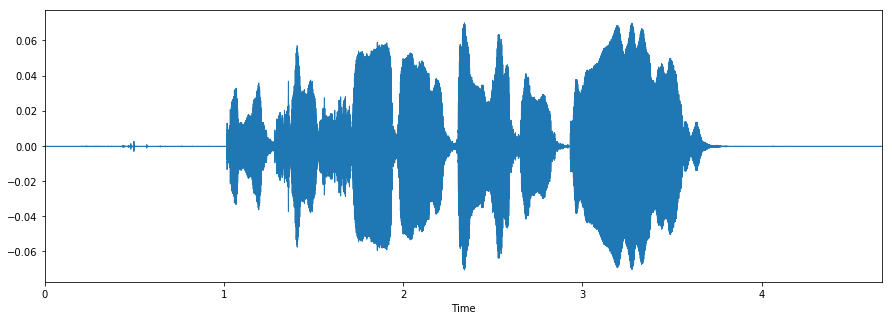

In [147]:
%pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

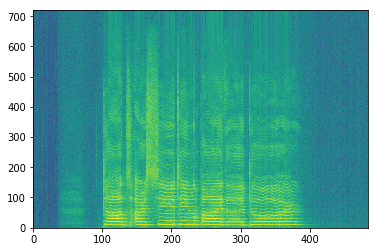

In [148]:
sr,x = scipy.io.wavfile.read('Ravdss dataset/03-02-01-01-02-01-02.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

In [149]:
df[:7]

,feature
0,"[0.29515146403619313, 0.2967826237946707, 0.29..."
1,"[0.28573063603164656, 0.28573063603164656, 0.2..."
2,"[0.22385823951544473, 0.20664520943133552, 0.2..."
3,"[0.2891481100328095, 0.289200601014271, 0.2859..."
4,"[0.2724534690579167, 0.28286445063412785, 0.29..."
5,"[0.3266169260197195, 0.3266169260197195, 0.326..."
6,"[0.32108839579714, 0.32108839579714, 0.3210883..."


In [150]:
df3 = pd.DataFrame(df['feature'].values.tolist())

df3[:5]

In [151]:
newdf = pd.concat([df3,labels], axis=1)

In [152]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [153]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,0.295151,0.296783,0.296827,0.296957,0.282657,0.270154,0.280082,0.280571,0.274069,0.280028,...,0.205792,0.189550,0.193413,0.188902,0.199243,0.207047,0.207789,0.152712,0.122110,male_calm
1,0.285731,0.285731,0.285731,0.285731,0.285731,0.285731,0.285731,0.285731,0.285731,0.285731,...,0.181855,0.190762,0.197329,0.181767,0.175351,0.178923,0.180700,0.098532,0.060443,female_calm
2,0.223858,0.206645,0.210091,0.230477,0.208367,0.202252,0.211089,0.219146,0.212346,0.211877,...,0.152670,0.163082,0.160383,0.158190,0.164906,0.171528,0.170686,0.179036,0.156612,male_calm
3,0.289148,0.289201,0.285920,0.277634,0.279489,0.277335,0.279819,0.279755,0.277184,0.282977,...,0.173721,0.182934,0.200154,0.201236,0.214796,0.217800,0.227942,0.197818,0.159022,female_calm
4,0.272453,0.282864,0.294559,0.256772,0.256673,0.289258,0.301287,0.263764,0.253580,0.261487,...,0.265324,0.259831,0.257955,0.262884,0.249615,0.233824,0.214426,0.189383,0.162207,male_calm


In [154]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
803,0.249913,0.249913,0.249913,0.243823,0.226322,0.218009,0.218306,0.233416,0.249913,0.249913,...,0.178744,0.182863,0.172734,0.169360,0.172900,0.178506,0.169236,0.158092,0.148895,male_fearful
76,0.151346,0.149763,0.153208,0.162201,0.168286,0.169893,0.177786,0.182811,0.196447,0.204676,...,0.209961,0.224172,0.203045,0.186913,0.180160,0.181088,0.172449,0.173006,0.177486,female_calm
358,0.258856,0.258856,0.258856,0.258856,0.258856,0.258856,0.258856,0.258442,0.253631,0.251831,...,0.183122,0.185960,0.179339,0.172426,0.182334,0.179841,0.163590,0.155371,0.127705,female_happy
156,0.302558,0.302558,0.302558,0.302558,0.302558,0.302558,0.302558,0.302558,0.302558,0.302558,...,0.239441,0.223241,0.229398,0.234247,0.226116,0.229581,0.224758,0.165208,0.132785,female_calm
146,0.324406,0.324410,0.322552,0.315537,0.321080,0.316376,0.313957,0.313163,0.317441,0.322165,...,0.226800,0.223625,0.223099,0.226295,0.222858,0.225993,0.229976,0.176508,0.138931,male_calm
524,0.281246,0.281246,0.281246,0.281246,0.281246,0.281246,0.281246,0.281246,0.281246,0.281246,...,0.225511,0.208681,0.204715,0.215573,0.222661,0.207477,0.207441,0.137157,0.101557,female_sad
893,0.255389,0.255389,0.236140,0.224510,0.225199,0.239927,0.232484,0.226952,0.220232,0.216071,...,0.190644,0.189939,0.180960,0.169156,0.167868,0.166940,0.170540,0.139833,0.100416,male_fearful
722,0.209085,0.209108,0.209108,0.209108,0.209108,0.209108,0.209108,0.209108,0.209108,0.209108,...,0.182248,0.195920,0.191323,0.184345,0.181292,0.144050,0.103583,0.067960,0.035137,female_angry
913,0.200541,0.201592,0.203990,0.209611,0.199389,0.198898,0.202522,0.204763,0.207912,0.196172,...,0.145140,0.151587,0.151905,0.146864,0.144244,0.148311,0.142980,0.064750,0.025055,male_fearful
312,0.255799,0.255799,0.255799,0.255799,0.255799,0.255799,0.255799,0.255799,0.255799,0.255799,...,0.166862,0.167564,0.183486,0.175120,0.180256,0.175468,0.158275,0.173614,0.160781,female_happy


In [155]:
rnewdf=rnewdf.fillna(0)

In [156]:
# Separate the dataset intot train data and test data #

In [157]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [158]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
337,0.242325,0.230681,0.208704,0.209614,0.230210,0.230766,0.218570,0.220084,0.208581,0.222890,...,0.200256,0.191779,0.189054,0.188962,0.185196,0.170089,0.183366,0.113166,0.078474,female_happy
144,0.320039,0.321174,0.322299,0.321867,0.322765,0.324645,0.325162,0.323203,0.324261,0.323859,...,0.240916,0.242386,0.237407,0.234419,0.232997,0.234548,0.236997,0.157354,0.121491,male_calm
180,0.251028,0.238497,0.235839,0.233038,0.236822,0.220914,0.219422,0.220196,0.223286,0.232768,...,0.176413,0.177743,0.179567,0.176009,0.176681,0.174896,0.174350,0.111204,0.072681,male_calm
797,0.245819,0.254620,0.264304,0.248946,0.252015,0.245834,0.221850,0.219226,0.220015,0.215031,...,0.169756,0.174851,0.190219,0.179187,0.178304,0.193495,0.205408,0.174107,0.149928,female_fearful
854,0.218395,0.218395,0.218395,0.218395,0.218395,0.218395,0.218395,0.218395,0.218395,0.218395,...,0.147330,0.145534,0.150698,0.173250,0.172783,0.173964,0.176207,0.144516,0.118624,female_fearful
14,0.202919,0.198146,0.199765,0.214385,0.228717,0.243513,0.235202,0.243479,0.256989,0.255876,...,0.145863,0.143977,0.138116,0.119225,0.125210,0.140182,0.147752,0.126605,0.083494,male_calm
381,0.283582,0.289089,0.288048,0.289373,0.296855,0.299303,0.297799,0.294786,0.297631,0.297122,...,0.232289,0.228963,0.195034,0.182842,0.193237,0.201184,0.201858,0.159496,0.126762,female_sad
853,0.119969,0.122967,0.135478,0.139445,0.128396,0.133975,0.132716,0.136615,0.132756,0.133245,...,0.116983,0.117004,0.112673,0.107678,0.111566,0.124056,0.122173,0.114824,0.108817,male_fearful
201,0.287745,0.287745,0.287745,0.268005,0.254015,0.254978,0.259437,0.274844,0.265555,0.251979,...,0.142713,0.149000,0.153864,0.155563,0.157117,0.156464,0.146065,0.155669,0.168495,male_happy
285,0.218320,0.220146,0.209437,0.211177,0.219124,0.207326,0.202457,0.210509,0.213314,0.206973,...,0.182354,0.175353,0.177458,0.180361,0.179699,0.149036,0.142139,0.077727,0.042211,female_happy


In [159]:
trainfeatures = train.iloc[:, :-1]

In [160]:
trainlabel = train.iloc[:, -1:]

In [161]:
testfeatures = test.iloc[:, :-1]

In [162]:
testlabel = test.iloc[:, -1:]

In [163]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [164]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [165]:
X_train.shape

(750, 216)

In [166]:
# Changing dimension for CNN model #

In [167]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn =np.expand_dims(X_test, axis=2)

In [168]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(10))) # model.add(MaxPooling1D(pool_size=(8)))#
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [169]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 216, 256)          1536      
_________________________________________________________________
activation_11 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 216, 128)          163968    
_________________________________________________________________
activation_12 (Activation)   (None, 216, 128)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 21, 128)           0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 21, 128)           82048     
__________

In [170]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [171]:
# train the CNN model "you can reduce the (epochs)"

In [172]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=300, validation_data=(x_testcnn, y_test))

Train on 750 samples, validate on 170 samples
Epoch 1/300
750/750 [==============================] - 3s 4ms/step - loss: 2.3025 - acc: 0.1000 - val_loss: 2.3027 - val_acc: 0.0941
Epoch 2/300
750/750 [==============================] - 3s 4ms/step - loss: 2.3022 - acc: 0.1040 - val_loss: 2.3027 - val_acc: 0.0706
Epoch 3/300
750/750 [==============================] - 3s 4ms/step - loss: 2.3019 - acc: 0.1147 - val_loss: 2.3027 - val_acc: 0.0765
Epoch 4/300
750/750 [==============================] - 3s 4ms/step - loss: 2.3017 - acc: 0.1107 - val_loss: 2.3028 - val_acc: 0.0765
Epoch 5/300
750/750 [==============================] - 3s 4ms/step - loss: 2.3015 - acc: 0.1107 - val_loss: 2.3028 - val_acc: 0.0765
Epoch 6/300
750/750 [==============================] - 3s 4ms/step - loss: 2.3013 - acc: 0.1107 - val_loss: 2.3028 - val_acc: 0.0765
Epoch 7/300
750/750 [==============================] - 3s 4ms/step - loss: 2.3010 - acc: 0.1107 - val_loss: 2.3029 - val_acc: 0.0765
Epoch 8/300
750/750 [==

Epoch 62/300
750/750 [==============================] - 3s 4ms/step - loss: 2.0741 - acc: 0.2493 - val_loss: 2.0891 - val_acc: 0.2176
Epoch 63/300
750/750 [==============================] - 3s 4ms/step - loss: 2.0682 - acc: 0.2453 - val_loss: 2.0796 - val_acc: 0.2000
Epoch 64/300
750/750 [==============================] - 3s 4ms/step - loss: 2.0640 - acc: 0.2560 - val_loss: 2.0764 - val_acc: 0.2176
Epoch 65/300
750/750 [==============================] - 3s 4ms/step - loss: 2.0581 - acc: 0.2547 - val_loss: 2.0733 - val_acc: 0.2000
Epoch 66/300
750/750 [==============================] - 3s 4ms/step - loss: 2.0562 - acc: 0.2600 - val_loss: 2.0713 - val_acc: 0.2118
Epoch 67/300
750/750 [==============================] - 3s 4ms/step - loss: 2.0509 - acc: 0.2507 - val_loss: 2.0665 - val_acc: 0.2294
Epoch 68/300
750/750 [==============================] - 3s 4ms/step - loss: 2.0475 - acc: 0.2733 - val_loss: 2.0586 - val_acc: 0.1941
Epoch 69/300
750/750 [==============================] - 3s 4ms

Epoch 123/300
750/750 [==============================] - 3s 4ms/step - loss: 1.9724 - acc: 0.2973 - val_loss: 1.9834 - val_acc: 0.2176
Epoch 124/300
750/750 [==============================] - 3s 4ms/step - loss: 1.9718 - acc: 0.3093 - val_loss: 1.9824 - val_acc: 0.2176
Epoch 125/300
750/750 [==============================] - 3s 4ms/step - loss: 1.9702 - acc: 0.3027 - val_loss: 1.9803 - val_acc: 0.2059
Epoch 126/300
750/750 [==============================] - 3s 4ms/step - loss: 1.9699 - acc: 0.2987 - val_loss: 1.9834 - val_acc: 0.2471
Epoch 127/300
750/750 [==============================] - 3s 4ms/step - loss: 1.9693 - acc: 0.3040 - val_loss: 1.9803 - val_acc: 0.2118
Epoch 128/300
750/750 [==============================] - 3s 4ms/step - loss: 1.9674 - acc: 0.2973 - val_loss: 1.9809 - val_acc: 0.2353
Epoch 129/300
750/750 [==============================] - 3s 4ms/step - loss: 1.9689 - acc: 0.3040 - val_loss: 1.9844 - val_acc: 0.2588
Epoch 130/300
750/750 [==============================] 

750/750 [==============================] - 3s 4ms/step - loss: 1.9150 - acc: 0.3053 - val_loss: 1.9415 - val_acc: 0.2235
Epoch 184/300
750/750 [==============================] - 3s 4ms/step - loss: 1.9139 - acc: 0.3120 - val_loss: 1.9408 - val_acc: 0.2235
Epoch 185/300
750/750 [==============================] - 3s 4ms/step - loss: 1.9133 - acc: 0.3107 - val_loss: 1.9383 - val_acc: 0.2235
Epoch 186/300
750/750 [==============================] - 3s 4ms/step - loss: 1.9116 - acc: 0.3067 - val_loss: 1.9424 - val_acc: 0.2412
Epoch 187/300
750/750 [==============================] - 3s 4ms/step - loss: 1.9107 - acc: 0.3133 - val_loss: 1.9409 - val_acc: 0.2353
Epoch 188/300
750/750 [==============================] - 3s 4ms/step - loss: 1.9090 - acc: 0.3120 - val_loss: 1.9370 - val_acc: 0.2118
Epoch 189/300
750/750 [==============================] - 3s 4ms/step - loss: 1.9030 - acc: 0.3187 - val_loss: 1.9581 - val_acc: 0.2824
Epoch 190/300
750/750 [==============================] - 3s 4ms/step 

Epoch 244/300
750/750 [==============================] - 3s 4ms/step - loss: 1.8316 - acc: 0.3440 - val_loss: 1.8827 - val_acc: 0.2588
Epoch 245/300
750/750 [==============================] - 3s 4ms/step - loss: 1.8296 - acc: 0.3440 - val_loss: 1.8817 - val_acc: 0.2647
Epoch 246/300
750/750 [==============================] - 3s 4ms/step - loss: 1.8299 - acc: 0.3480 - val_loss: 1.8841 - val_acc: 0.2765
Epoch 247/300
750/750 [==============================] - 3s 4ms/step - loss: 1.8280 - acc: 0.3453 - val_loss: 1.8797 - val_acc: 0.2706
Epoch 248/300
750/750 [==============================] - 3s 4ms/step - loss: 1.8263 - acc: 0.3467 - val_loss: 1.8824 - val_acc: 0.2765
Epoch 249/300
750/750 [==============================] - 3s 4ms/step - loss: 1.8245 - acc: 0.3493 - val_loss: 1.8774 - val_acc: 0.2647
Epoch 250/300
750/750 [==============================] - 3s 4ms/step - loss: 1.8228 - acc: 0.3453 - val_loss: 1.8786 - val_acc: 0.2706
Epoch 251/300
750/750 [==============================] 

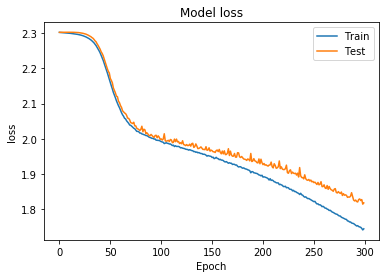

In [173]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

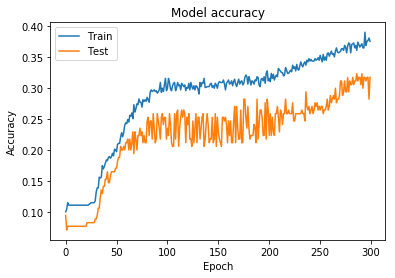

In [174]:
# Sigmoid
plt.plot(cnnhistory.history['acc'])
plt.plot(cnnhistory.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [175]:
# Saving the model#

In [176]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\CGU\Downloads\ASR on speech emotion recogination\saved_models\Emotion_Voice_Detection_Model.h5 


In [177]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [178]:
# Loading the model from the saved loction #

In [179]:
# loading json and creating model #
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 31.76%


In [180]:
# Predicting emotions on the test data #

In [181]:
preds = loaded_model.predict(x_testcnn, batch_size=32, verbose=1)

170/170 [==============================] - 0s 2ms/step


In [182]:
preds

array([[3.49131450e-02, 1.69386063e-02, 7.51782954e-02, ...,
        1.53780892e-01, 2.91860104e-01, 9.25666988e-02],
       [1.93339720e-01, 3.52221192e-04, 9.74526703e-02, ...,
        1.41794875e-01, 7.80279562e-02, 2.36315988e-02],
       [6.94627268e-03, 2.31807545e-01, 2.90566031e-02, ...,
        2.61200499e-02, 7.63250291e-02, 1.80258527e-01],
       ...,
       [1.88558236e-01, 2.85977148e-05, 7.93165416e-02, ...,
        3.15828890e-01, 4.23618779e-02, 9.47088189e-03],
       [2.52625067e-02, 1.18061565e-01, 7.68606886e-02, ...,
        7.16232806e-02, 4.65459004e-02, 1.43402740e-01],
       [1.82010293e-01, 7.63104344e-03, 1.59278557e-01, ...,
        1.45568088e-01, 1.11793235e-01, 4.21019904e-02]], dtype=float32)

In [183]:
preds1=preds.argmax(axis=1)

In [184]:
preds1

array([8, 5, 6, 6, 2, 6, 0, 0, 1, 6, 7, 5, 7, 4, 0, 6, 5, 5, 5, 8, 1, 1,
       5, 1, 2, 1, 8, 4, 4, 4, 0, 4, 6, 5, 5, 1, 5, 6, 6, 6, 8, 3, 5, 6,
       3, 0, 6, 8, 4, 7, 1, 3, 1, 4, 8, 4, 6, 2, 7, 0, 5, 2, 8, 6, 4, 6,
       7, 0, 8, 6, 2, 5, 0, 2, 1, 7, 7, 0, 8, 3, 4, 7, 5, 6, 5, 6, 3, 8,
       0, 8, 3, 6, 8, 0, 6, 5, 9, 1, 3, 1, 3, 0, 6, 5, 5, 4, 8, 3, 7, 1,
       5, 9, 4, 5, 8, 5, 7, 3, 6, 5, 1, 5, 8, 8, 6, 9, 1, 1, 6, 0, 6, 7,
       7, 8, 3, 1, 8, 5, 2, 1, 1, 5, 5, 1, 7, 5, 2, 4, 5, 0, 0, 4, 1, 8,
       8, 1, 4, 0, 7, 6, 5, 3, 5, 4, 3, 0, 4, 5, 6, 5], dtype=int64)

In [185]:
abc = preds1.astype(int).flatten()

In [186]:
predictions = (lb.inverse_transform((abc)))

In [187]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,male_happy
1,male_angry
2,male_calm
3,male_calm
4,female_fearful
5,male_calm
6,female_angry
7,female_angry
8,female_calm
9,male_calm


In [188]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [189]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,male_fearful
1,female_angry
2,male_calm
3,female_sad
4,female_happy
5,male_calm
6,female_angry
7,female_angry
8,female_sad
9,male_calm


In [190]:
finaldf = actualdf.join(preddf)

In [191]:
# The % of the Actual emotions v/s the Predicted emotions #

In [192]:
finaldf[70:100]

,actualvalues,predictedvalues
70,female_angry,female_fearful
71,male_angry,male_angry
72,male_happy,female_angry
73,female_angry,female_fearful
74,male_sad,female_calm
75,female_fearful,male_fearful
76,female_fearful,male_fearful
77,female_happy,female_angry
78,female_happy,male_happy
79,female_happy,female_happy


In [193]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_angry,20
female_calm,15
female_fearful,18
female_happy,15
female_sad,11
male_angry,17
male_calm,13
male_fearful,18
male_happy,19


In [194]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,17
female_calm,21
female_fearful,8
female_happy,13
female_sad,17
male_angry,31
male_calm,26
male_fearful,14
male_happy,20


In [195]:
                                         # real time Input speech #

In [196]:
# Change the file name after RawData/     .wav
data, sampling_rate = librosa.load('SAVEE Dataset/01-01-01-01 (25).wav')

Populating the interactive namespace from numpy and matplotlib


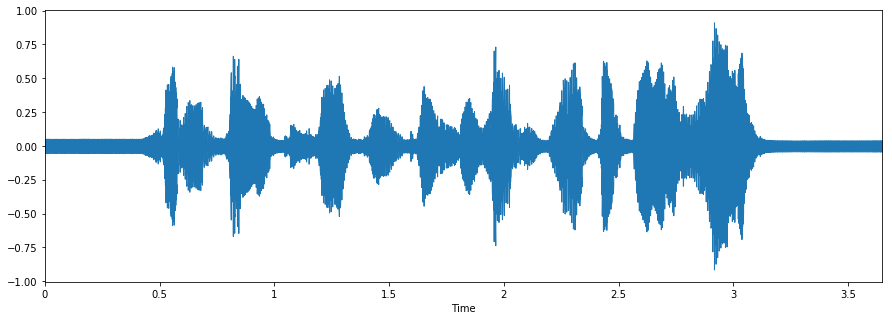

In [197]:
%pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

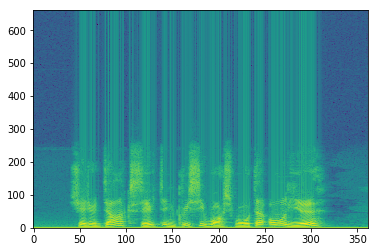

In [198]:
sr,x = scipy.io.wavfile.read('SAVEE Dataset/01-01-01-01 (25).wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

In [199]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('SAVEE Dataset/01-01-01-01 (25).wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [200]:
livedf2= pd.DataFrame(data=livedf2)

In [201]:
livedf2 = livedf2.stack().to_frame().T

In [202]:
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-11.113933,-7.215754,-6.219192,-5.926543,-5.850419,-4.808961,-2.513001,-3.500538,-3.721046,-4.487559,...,-4.088851,-5.023862,-5.254715,-5.234093,-5.310309,-5.621665,-6.072197,-6.611349,-2.509087,1.964607


In [203]:
twodim= np.expand_dims(livedf2, axis=2)

In [204]:
livepreds = loaded_model.predict(twodim, batch_size=32, verbose=1)

1/1 [==============================] - 0s 0us/step


In [205]:
livepreds

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.8164433e-33, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [206]:
livepreds1=livepreds.argmax(axis=1)

In [207]:
liveabc = livepreds1.astype(int).flatten()

In [208]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

array(['male_fearful'], dtype=object)

                                                        # The end #